In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
#numericals
customer_df_num = customer_df.select_dtypes(np.number)
customer_df_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


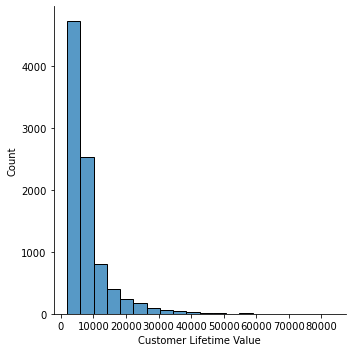

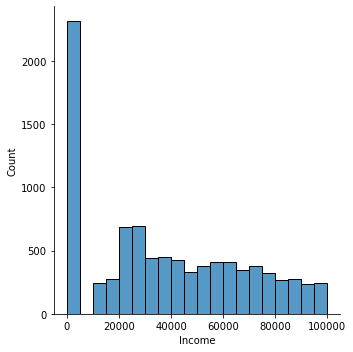

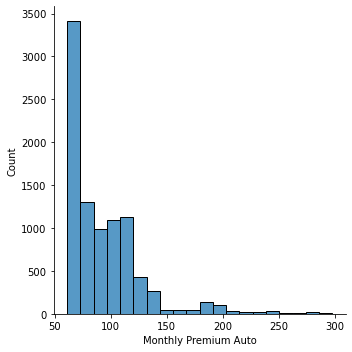

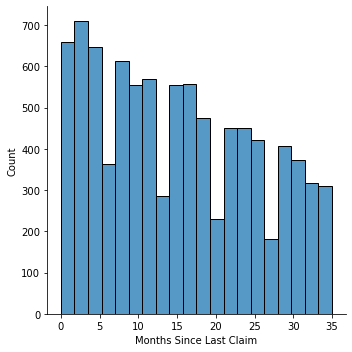

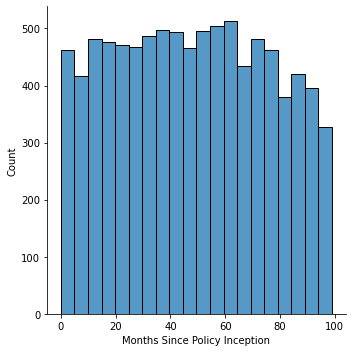

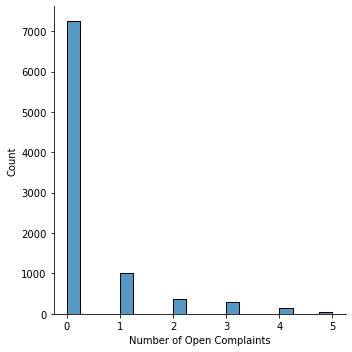

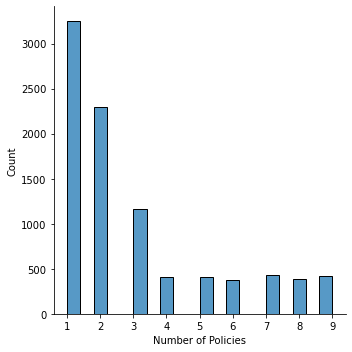

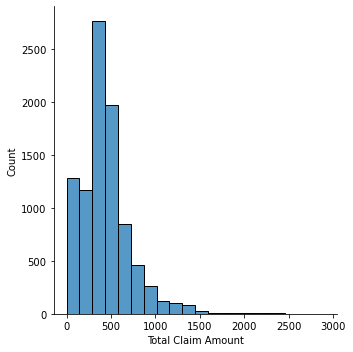

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in customer_df_num.columns:
    sns.displot(customer_df_num[i], bins=20)
    plt.show()


In [ ]:
#cusomer lifetime value, income, monthly premium auto, (number of open complaints) = inverse (exponential) 

In [7]:
def log_transfom_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [23]:
# pd.Series(customer_df_num['Customer Lifetime Value'].apply(log_transfom_clean)).hist()   #changes from the original graph, kindof a normal distribution (maybe)
# plt.show()

In [22]:
# pd.Series(customer_df_num['Income'].apply(log_transfom_clean)).hist() #yes log transform changes income a little
# plt.show()

In [21]:
# pd.Series(customer_df_num['Monthly Premium Auto'].apply(log_transfom_clean)).hist() #yes log transform changes this graph a little
# plt.show()

In [17]:
# pd.Series(customer_df_num['Number of Open Complaints'].apply(log_transfom_clean)).hist()
# plt.show()

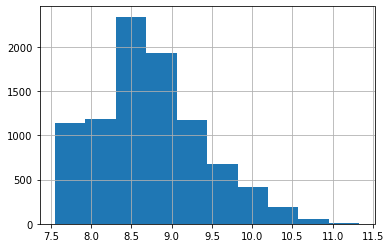

Customer Lifetime Value


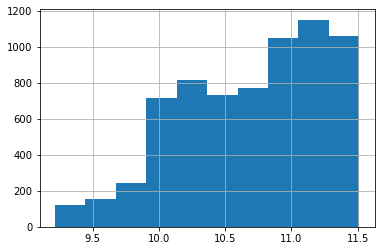

Income


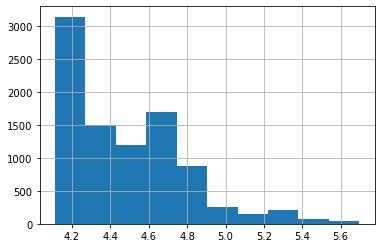

Monthly Premium Auto


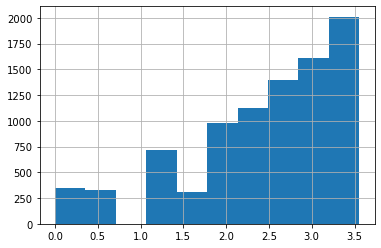

Months Since Last Claim


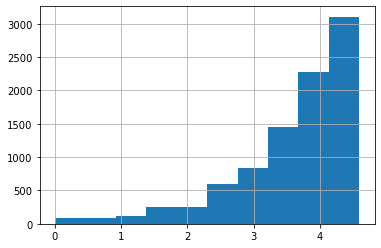

Months Since Policy Inception


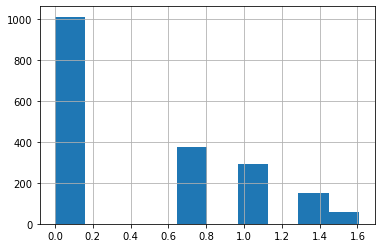

Number of Open Complaints


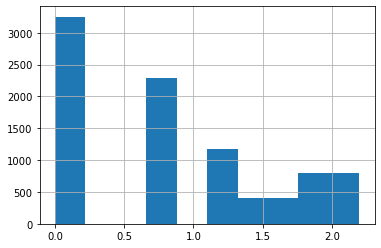

Number of Policies


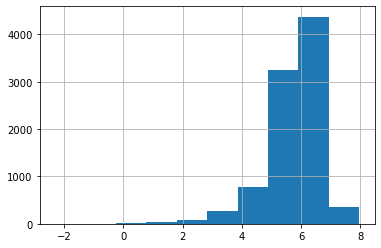

Total Claim Amount


In [20]:
for i in customer_df_num.columns:
    pd.Series(customer_df_num[i].apply(log_transfom_clean)).hist()
    plt.show()
    print(i)

In [ ]:
#conclusion
#-----Months Since Policy Inception goes from equal distribution to exponential after log transform---------
# Customer Lifetime Value: Log normalizes distribution
# Income: Inverses
# Months Since Last Claim: Inverses
# Total CLaim Amount: Inverses
#everything else stays about the same